In [10]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD
import numpy as np

(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label=True)
x_train, t_train = x_train[:300], t_train[:300]

weight_decay_lambda = 0

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_ep = 300
train_size = x_train.shape[0]
batch = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch, 1)
epoch = 0

for i in range(10000000):
    batch_mask = np.random.choice(train_size, batch)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        epoch += 1
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'epoch: {epoch}, train acc: {train_acc:.4f}, test acc: {test_acc:.4f}')
        
        if epoch >= max_ep:
            break

epoch: 1, train acc: 0.1767, test acc: 0.1471
epoch: 2, train acc: 0.1967, test acc: 0.1722
epoch: 3, train acc: 0.2267, test acc: 0.1850
epoch: 4, train acc: 0.2367, test acc: 0.1983
epoch: 5, train acc: 0.2767, test acc: 0.2076
epoch: 6, train acc: 0.3067, test acc: 0.2117
epoch: 7, train acc: 0.3367, test acc: 0.2256
epoch: 8, train acc: 0.3600, test acc: 0.2391
epoch: 9, train acc: 0.3967, test acc: 0.2503
epoch: 10, train acc: 0.4133, test acc: 0.2649
epoch: 11, train acc: 0.4467, test acc: 0.2880
epoch: 12, train acc: 0.4767, test acc: 0.3117
epoch: 13, train acc: 0.5000, test acc: 0.3270
epoch: 14, train acc: 0.5200, test acc: 0.3402
epoch: 15, train acc: 0.5100, test acc: 0.3454
epoch: 16, train acc: 0.5233, test acc: 0.3642
epoch: 17, train acc: 0.5633, test acc: 0.3761
epoch: 18, train acc: 0.5833, test acc: 0.3906
epoch: 19, train acc: 0.5800, test acc: 0.4016
epoch: 20, train acc: 0.5800, test acc: 0.4019
epoch: 21, train acc: 0.6333, test acc: 0.4212
epoch: 22, train acc: 

Weight Decay

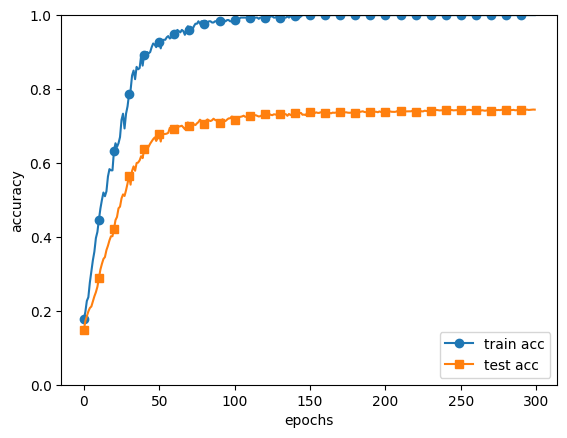

In [12]:
from matplotlib import pyplot as plt

maker = {'train': 'o', 'test': 's'}
x = np.arange(max_ep)
plt.plot(x, train_acc_list, label='train acc', marker=maker['train'], markevery=10)
plt.plot(x, test_acc_list, label='test acc', marker=maker['test'], markevery=10)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


None weight decay

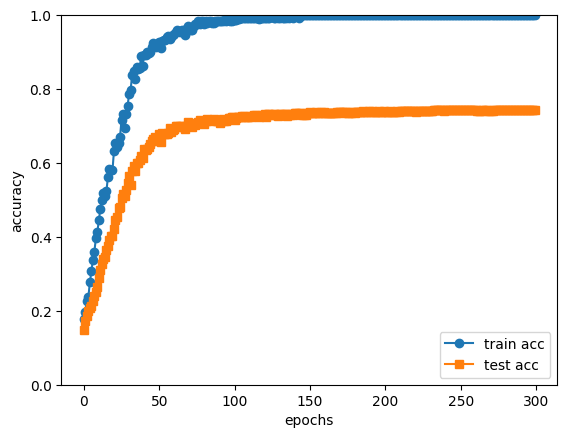

In [11]:
from matplotlib import pyplot as plt

maker = {'train': 'o', 'test': 's'}
x = np.arange(max_ep)
plt.plot(x, train_acc_list, label='train acc', marker=maker['train'])
plt.plot(x, test_acc_list, label='test acc', marker=maker['test'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [ ]:
from common.layers import Dropout

